In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import glob

In [3]:
#First dataframe is from - #https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip
#Read all csv files 
path = r'C:\Personal\AIML\Mini_Capstone_Feb_2021\Mobility\Region_Mobility_Report_CSVs' # use your path
all_files = glob.glob(path + "/*.csv")

In [4]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    #print (filename)
    li.append(df)

C:\Programs\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
frame = pd.concat(li, axis=0, ignore_index=True)

In [6]:
frame.shape

(4213721, 14)

In [7]:
frame.dtypes

country_region_code                                    object
country_region                                         object
sub_region_1                                           object
sub_region_2                                           object
metro_area                                             object
iso_3166_2_code                                        object
census_fips_code                                      float64
date                                                   object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [8]:
frame.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [9]:
frame.isnull().sum()

country_region_code                                      2682
country_region                                              0
sub_region_1                                            71834
sub_region_2                                           702075
metro_area                                            4190391
iso_3166_2_code                                       3459427
census_fips_code                                      3315898
date                                                        0
retail_and_recreation_percent_change_from_baseline    1564668
grocery_and_pharmacy_percent_change_from_baseline     1657466
parks_percent_change_from_baseline                    2191621
transit_stations_percent_change_from_baseline         2084085
workplaces_percent_change_from_baseline                195813
residential_percent_change_from_baseline              1765120
dtype: int64

In [10]:
#len(gmd_us['sub_region_1'].unique())

In [11]:
#get country level mobility data
frame_1 = frame[frame.sub_region_1.isnull()]
frame_sub = frame_1[frame.metro_area.isnull()]

C:\Programs\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
frame_sub.shape

(48504, 14)

In [13]:
frame_sub.isnull().sum()

country_region_code                                     361
country_region                                            0
sub_region_1                                          48504
sub_region_2                                          48504
metro_area                                            48504
iso_3166_2_code                                       48504
census_fips_code                                      48504
date                                                      0
retail_and_recreation_percent_change_from_baseline      900
grocery_and_pharmacy_percent_change_from_baseline       929
parks_percent_change_from_baseline                     1148
transit_stations_percent_change_from_baseline           826
workplaces_percent_change_from_baseline                 137
residential_percent_change_from_baseline               1179
dtype: int64

In [14]:
frame_sub.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [15]:
#drop unwanted columns
mob_df = frame_sub.drop(['sub_region_1','sub_region_2','metro_area','iso_3166_2_code','iso_3166_2_code','census_fips_code'],axis=1)

In [16]:
mob_df.head()

,country_region_code,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [17]:
mob_df.shape

(48504, 9)

In [18]:
mob_df['country_region_code'].unique()

array(['AE', 'AF', 'AG', 'AO', 'AR', 'AT', 'AU', 'AW', 'BA', 'BB', 'BD',
       'BE', 'BF', 'BG', 'BH', 'BJ', 'BO', 'BR', 'BS', 'BW', 'BY', 'BZ',
       'CA', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CZ', 'DE', 'DK',
       'DO', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FR', 'GA', 'GB', 'GE',
       'GH', 'GR', 'GT', 'GW', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE',
       'IL', 'IN', 'IQ', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KR',
       'KW', 'KZ', 'LA', 'LB', 'LI', 'LK', 'LT', 'LU', 'LV', 'LY', 'MA',
       'MD', 'MK', 'ML', 'MM', 'MN', 'MT', 'MU', 'MX', 'MY', 'MZ', nan,
       'NE', 'NG', 'NI', 'NL', 'NO', 'NP', 'NZ', 'OM', 'PA', 'PE', 'PG',
       'PH', 'PK', 'PL', 'PR', 'PT', 'PY', 'QA', 'RE', 'RO', 'RS', 'RU',
       'RW', 'SA', 'SE', 'SG', 'SI', 'SK', 'SN', 'SV', 'TG', 'TH', 'TJ',
       'TR', 'TT', 'TW', 'TZ', 'UA', 'UG', 'US', 'UY', 'VE', 'VN', 'YE',
       'ZA', 'ZM', 'ZW'], dtype=object)

In [19]:
len(mob_df['country_region_code'].unique())

135

In [20]:
mob_df.dtypes

country_region_code                                    object
country_region                                         object
date                                                   object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [21]:
mob_df.describe().T

,count,mean,std,min,25%,50%,75%,max
retail_and_recreation_percent_change_from_baseline,47604.0,-23.944542,24.426722,-100.0,-38.0,-20.0,-7.0,91.0
grocery_and_pharmacy_percent_change_from_baseline,47575.0,-6.579107,22.028571,-100.0,-16.0,-4.0,4.0,162.0
parks_percent_change_from_baseline,47356.0,-2.712053,47.310655,-100.0,-28.0,-11.0,9.0,517.0
transit_stations_percent_change_from_baseline,47678.0,-28.480851,24.518424,-100.0,-45.0,-28.0,-11.0,91.0
workplaces_percent_change_from_baseline,48367.0,-21.871524,20.029927,-99.0,-33.0,-20.0,-8.0,80.0
residential_percent_change_from_baseline,47325.0,9.490333,8.887970,-35.0,3.0,8.0,14.0,55.0


<Figure size 432x288 with 0 Axes>

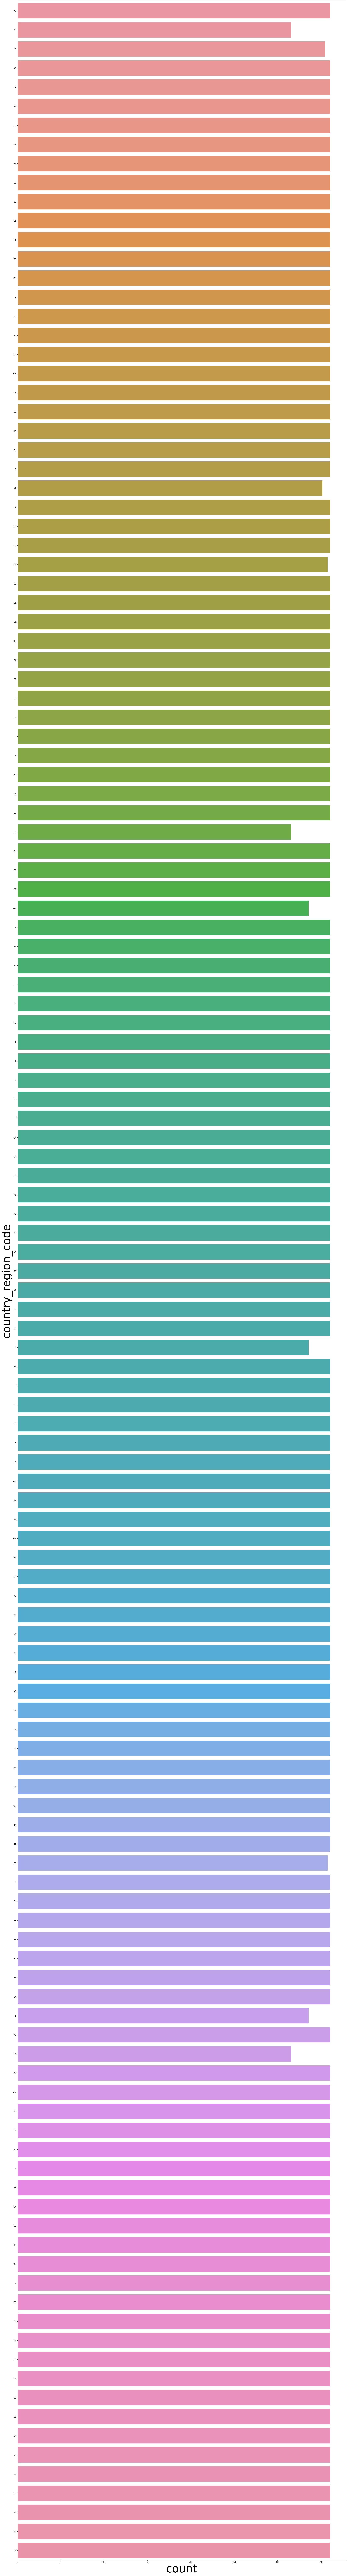

In [22]:
fig = plt.figure()
plt.figure(figsize=(32, 256))
plt.xlabel('xlabel', fontsize=60)
plt.ylabel('ylabel', fontsize=60)
fig.suptitle('test title', fontsize=20)
sns.countplot(y=mob_df.country_region_code)

In [23]:
mob_df["retail_and_recreation_percent_change_from_baseline_2"] = mob_df["retail_and_recreation_percent_change_from_baseline"].shift(2) 
mob_df["retail_and_recreation_percent_change_from_baseline_1"] = mob_df["retail_and_recreation_percent_change_from_baseline"].shift() 


mob_df["grocery_and_pharmacy_percent_change_from_baseline_2"] = mob_df["grocery_and_pharmacy_percent_change_from_baseline"].shift(2)
mob_df["grocery_and_pharmacy_percent_change_from_baseline_1"] = mob_df["grocery_and_pharmacy_percent_change_from_baseline"].shift() 

mob_df["parks_percent_change_from_baseline_2"] = mob_df["parks_percent_change_from_baseline"].shift(2)
mob_df["parks_percent_change_from_baseline_1"] = mob_df["parks_percent_change_from_baseline"].shift() 

mob_df["transit_stations_percent_change_from_baseline_2"] = mob_df["transit_stations_percent_change_from_baseline"].shift(2)
mob_df["transit_stations_percent_change_from_baseline_1"] = mob_df["transit_stations_percent_change_from_baseline"].shift() 

mob_df["workplaces_percent_change_from_baseline_2"] = mob_df["workplaces_percent_change_from_baseline"].shift(2)
mob_df["workplaces_percent_change_from_baseline_1"] = mob_df["workplaces_percent_change_from_baseline"].shift() 

mob_df["residential_percent_change_from_baseline_2"] = mob_df["residential_percent_change_from_baseline"].shift(2)
mob_df["residential_percent_change_from_baseline_1"] = mob_df["residential_percent_change_from_baseline"].shift() 

In [24]:
mob_df.reset_index()

,index,country_region_code,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,...,grocery_and_pharmacy_percent_change_from_baseline_2,grocery_and_pharmacy_percent_change_from_baseline_1,parks_percent_change_from_baseline_2,parks_percent_change_from_baseline_1,transit_stations_percent_change_from_baseline_2,transit_stations_percent_change_from_baseline_1,workplaces_percent_change_from_baseline_2,workplaces_percent_change_from_baseline_1,residential_percent_change_from_baseline_2,residential_percent_change_from_baseline_1
0,0,AE,United Arab Emirates,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AE,United Arab Emirates,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0,...,NaN,4.0,NaN,5.0,NaN,0.0,NaN,2.0,NaN,1.0
2,2,AE,United Arab Emirates,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0,...,4.0,4.0,5.0,4.0,0.0,1.0,2.0,2.0,1.0,1.0
3,3,AE,United Arab Emirates,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0,...,4.0,1.0,4.0,5.0,1.0,1.0,2.0,2.0,1.0,1.0
4,4,AE,United Arab Emirates,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0,...,1.0,1.0,5.0,5.0,1.0,0.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48499,4207569,ZW,Zimbabwe,2021-02-05,-29.0,-10.0,-14.0,-41.0,-30.0,19.0,...,-10.0,-10.0,-9.0,-12.0,-43.0,-41.0,-33.0,-34.0,17.0,19.0
48500,4207570,ZW,Zimbabwe,2021-02-06,-28.0,-3.0,-4.0,-41.0,-19.0,12.0,...,-10.0,-10.0,-12.0,-14.0,-41.0,-41.0,-34.0,-30.0,19.0,19.0
48501,4207571,ZW,Zimbabwe,2021-02-07,-30.0,-9.0,1.0,-41.0,-15.0,13.0,...,-10.0,-3.0,-14.0,-4.0,-41.0,-41.0,-30.0,-19.0,19.0,12.0
48502,4207572,ZW,Zimbabwe,2021-02-08,-28.0,-15.0,-4.0,-37.0,-30.0,19.0,...,-3.0,-9.0,-4.0,1.0,-41.0,-41.0,-19.0,-15.0,12.0,13.0


In [25]:
#Coronavirus Source Data
#Available from https://covid.ourworldindata.org/data/owid-covid-data.csv
ow_df = pd.read_csv('owid-covid-data.csv',encoding='latin1')

In [26]:
ow_df.rename(columns = {'location':'country_region'}, inplace = True) 

In [27]:
ow_df.columns

Index(['iso_code', 'continent', 'country_region', 'date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_p

In [28]:
len(ow_df.country_region.unique())

212

In [29]:
ow_df.iso_code.unique()

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA',
       'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV',
       'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'CRI',
       'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA',
       'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH',
       'OWID_EUR', 'OWID_EUN', 'FRO', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB',
       'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM', 'GGY',
       'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND',
       'IDN', 'OWID_INT', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM',
       'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'OWID_KOS', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MDG',
       'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX

In [30]:
ow_df.shape

(68774, 59)

In [32]:
mob_df.shape

(48504, 21)

In [33]:
#merge the data frame based on country and date
df = mob_df.merge(ow_df, on=['country_region','date'], how='left')

In [34]:
df.columns

Index(['country_region_code', 'country_region', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'retail_and_recreation_percent_change_from_baseline_2',
       'retail_and_recreation_percent_change_from_baseline_1',
       'grocery_and_pharmacy_percent_change_from_baseline_2',
       'grocery_and_pharmacy_percent_change_from_baseline_1',
       'parks_percent_change_from_baseline_2',
       'parks_percent_change_from_baseline_1',
       'transit_stations_percent_change_from_baseline_2',
       'transit_stations_percent_change_from_baseline_1',
       'workplaces_percent_change_from_baseline_2',
       'workplaces_percent_change_from_baseline_1',
       'residential_percent_change_from_baseline_2',
    

In [35]:
df.shape

(48504, 78)

In [36]:
len(df.country_region.unique())

135

In [37]:
df.iso_code.unique()

array(['ARE', nan, 'AFG', 'ATG', 'AGO', 'ARG', 'AUT', 'AUS', 'BIH', 'BRB',
       'BGD', 'BEL', 'BFA', 'BGR', 'BHR', 'BEN', 'BOL', 'BRA', 'BWA',
       'BLR', 'BLZ', 'CAN', 'CHE', 'CHL', 'CMR', 'COL', 'CRI', 'CPV',
       'CZE', 'DEU', 'DNK', 'DOM', 'ECU', 'EST', 'EGY', 'ESP', 'FIN',
       'FJI', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GRC', 'GTM', 'GNB',
       'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IRL', 'ISR', 'IND',
       'IRQ', 'ITA', 'JAM', 'JOR', 'JPN', 'KEN', 'KGZ', 'KHM', 'KOR',
       'KWT', 'KAZ', 'LAO', 'LBN', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA',
       'LBY', 'MAR', 'MDA', 'MKD', 'MLI', 'MNG', 'MLT', 'MUS', 'MEX',
       'MYS', 'MOZ', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL',
       'NZL', 'OMN', 'PAN', 'PER', 'PNG', 'PHL', 'PAK', 'POL', 'PRT',
       'PRY', 'QAT', 'ROU', 'SRB', 'RUS', 'RWA', 'SAU', 'SWE', 'SGP',
       'SVN', 'SVK', 'SEN', 'SLV', 'TGO', 'THA', 'TJK', 'TUR', 'TTO',
       'TWN', 'TZA', 'UKR', 'UGA', 'USA', 'URY', 'VEN', 'VNM', 'YEM',
       'ZAF', '

In [40]:
df.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline_2,retail_and_recreation_percent_change_from_baseline_1,grocery_and_pharmacy_percent_change_from_baseline_2,grocery_and_pharmacy_percent_change_from_baseline_1,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,47604.000000,47575.000000,47356.000000,47678.000000,48367.000000,47325.000000,47602.000000,47603.000000,47573.000000,47574.000000,...,43396.000000,30971.000000,43684.00000,43714.000000,37702.000000,37025.000000,19223.000000,41331.000000,44075.00000,43714.000000
mean,-23.944542,-6.579107,-2.712053,-28.480851,-21.871524,9.490333,-23.944372,-23.944457,-6.578879,-6.579056,...,21957.260827,9.946182,241.31420,7.706851,11.681245,31.364659,56.346123,3.177547,74.38009,0.759335
std,24.426722,22.028571,47.310655,24.518424,20.029927,8.887970,24.427221,24.426971,22.028998,22.028800,...,20761.889085,16.599267,118.35119,3.963169,10.417005,12.298646,30.150412,2.541022,6.84468,0.140999
min,-100.000000,-100.000000,-100.000000,-100.000000,-99.000000,-35.000000,-100.000000,-100.000000,-100.000000,-100.000000,...,926.000000,0.100000,79.37000,0.990000,0.100000,7.700000,2.735000,0.100000,54.69000,0.394000
25%,-38.000000,-16.000000,-28.000000,-45.000000,-33.000000,3.000000,-38.000000,-38.000000,-16.000000,-16.000000,...,6222.554000,0.500000,145.18300,5.070000,2.400000,21.000000,26.664000,1.300000,70.60000,0.665000
50%,-20.000000,-4.000000,-11.000000,-28.000000,-20.000000,8.000000,-20.000000,-20.000000,-4.000000,-4.000000,...,15807.374000,1.600000,218.63700,7.070000,7.600000,30.700000,59.550000,2.500000,75.40000,0.779000
75%,-7.000000,4.000000,9.000000,-11.000000,-8.000000,14.000000,-7.000000,-7.000000,4.000000,4.000000,...,32605.906000,12.000000,298.24500,9.740000,20.100000,39.900000,85.847000,4.500000,80.18000,0.882000
max,91.000000,162.000000,517.000000,91.000000,80.000000,55.000000,91.000000,91.000000,162.000000,162.000000,...,116935.600000,67.100000,597.02900,22.020000,37.700000,76.100000,98.999000,13.050000,84.86000,0.957000


In [41]:
df.isnull().sum()

country_region_code                                     361
country_region                                            0
date                                                      0
retail_and_recreation_percent_change_from_baseline      900
grocery_and_pharmacy_percent_change_from_baseline       929
                                                      ...  
male_smokers                                          11479
handwashing_facilities                                29281
hospital_beds_per_thousand                             7173
life_expectancy                                        4429
human_development_index                                4790
Length: 78, dtype: int64

In [43]:
df_1 = df.drop(['iso_code', 'continent','total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],axis=1);

In [44]:
df_1.columns

Index(['country_region_code', 'country_region', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'retail_and_recreation_percent_change_from_baseline_2',
       'retail_and_recreation_percent_change_from_baseline_1',
       'grocery_and_pharmacy_percent_change_from_baseline_2',
       'grocery_and_pharmacy_percent_change_from_baseline_1',
       'parks_percent_change_from_baseline_2',
       'parks_percent_change_from_baseline_1',
       'transit_stations_percent_change_from_baseline_2',
       'transit_stations_percent_change_from_baseline_1',
       'workplaces_percent_change_from_baseline_2',
       'workplaces_percent_change_from_baseline_1',
       'residential_percent_change_from_baseline_2',
    